### Importing the required libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
import plotly.express as px
import plotly.graph_objects as go


### Uploading our dataset and converting into dataframe using pandas

In [2]:
df=pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [3]:
df.shape


(8807, 12)

In [4]:
df.describe()


,release_year
count,8807.000000
mean,2014.180198
std,8.819312
min,1925.000000
25%,2013.000000
50%,2017.000000
75%,2019.000000
max,2021.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


### Missing Values

In [6]:
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

In [7]:
df.isna().sum()*100 /len(df) #showing percentage of missing values

show_id          0.000000
type             0.000000
title            0.000000
director        29.908028
cast             9.367549
country          9.435676
date_added       0.113546
release_year     0.000000
rating           0.045418
duration         0.034064
listed_in        0.000000
description      0.000000
dtype: float64

### Adjusting Datatype

In [8]:
df['date_added']=pd.to_datetime(df['date_added'],format='mixed') 
# changing the date_added column datatype from object to datetime

In [9]:
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,2021-09-25,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,2021-09-24,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,2021-09-24,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,2021-09-24,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


### Handling Missing Values

In [10]:
df.fillna({'cast':'Unavailable','country':'Unavailable','rating':'Unavailable','director':'Unavailable'},inplace=True)
df.isna().sum()

show_id          0
type             0
title            0
director         0
cast             0
country          0
date_added      10
release_year     0
rating           0
duration         3
listed_in        0
description      0
dtype: int64

In [11]:
df[df.date_added.isna()].head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6066,s6067,TV Show,A Young Doctor's Notebook and Other Stories,Unavailable,"Daniel Radcliffe, Jon Hamm, Adam Godley, Chris...",United Kingdom,NaT,2013,TV-MA,2 Seasons,"British TV Shows, TV Comedies, TV Dramas","Set during the Russian Revolution, this comic ..."
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,NaT,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...
6795,s6796,TV Show,Frasier,Unavailable,"Kelsey Grammer, Jane Leeves, David Hyde Pierce...",United States,NaT,2003,TV-PG,11 Seasons,"Classic & Cult TV, TV Comedies",Frasier Crane is a snooty but lovable Seattle ...
6806,s6807,TV Show,Friends,Unavailable,"Jennifer Aniston, Courteney Cox, Lisa Kudrow, ...",United States,NaT,2003,TV-14,10 Seasons,"Classic & Cult TV, TV Comedies",This hit sitcom follows the merry misadventure...
6901,s6902,TV Show,Gunslinger Girl,Unavailable,"Yuuka Nanri, Kanako Mitsuhashi, Eri Sendai, Am...",Japan,NaT,2008,TV-14,2 Seasons,"Anime Series, Crime TV Shows","On the surface, the Social Welfare Agency appe..."


>Filling the null values of date_added column with the most recent date

In [12]:
df_sort = df.sort_values(by='date_added', ascending=False)
most_recent_date = df_sort.iloc[0]['date_added'] 
df.fillna({'date_added':most_recent_date},inplace=True)

In [13]:
df_sort = df.sort_values(by='date_added', ascending=False)
most_recent_date = df_sort.iloc[0]['date_added'] 
df.fillna({'date_added':most_recent_date},inplace=True)

In [14]:
df[df.show_id=='s6175'] #checking whether the missing dates are filled with the most recent date

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
6174,s6175,TV Show,Anthony Bourdain: Parts Unknown,Unavailable,Anthony Bourdain,United States,2021-09-25,2018,TV-PG,5 Seasons,Docuseries,This CNN original series has chef Anthony Bour...


### Additional Data Cleaning

In [15]:
df[df.duration.isna()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,NaN,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,NaN,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,NaN,Movies,The comic puts his trademark hilarious/thought...


In [16]:
df.loc[df['director']=='Louis C.K.','duration']=df['rating']
df[df.director=='Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,74 min,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,84 min,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,66 min,66 min,Movies,The comic puts his trademark hilarious/thought...


In [17]:
df.loc[df['director']=='Louis C.K.','rating']='Unavailable'
df[df.director=='Louis C.K.']

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
5541,s5542,Movie,Louis C.K. 2017,Louis C.K.,Louis C.K.,United States,2017-04-04,2017,Unavailable,74 min,Movies,"Louis C.K. muses on religion, eternal love, gi..."
5794,s5795,Movie,Louis C.K.: Hilarious,Louis C.K.,Louis C.K.,United States,2016-09-16,2010,Unavailable,84 min,Movies,Emmy-winning comedy writer Louis C.K. brings h...
5813,s5814,Movie,Louis C.K.: Live at the Comedy Store,Louis C.K.,Louis C.K.,United States,2016-08-15,2015,Unavailable,66 min,Movies,The comic puts his trademark hilarious/thought...


### Visualizations

In [18]:
df.type.value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

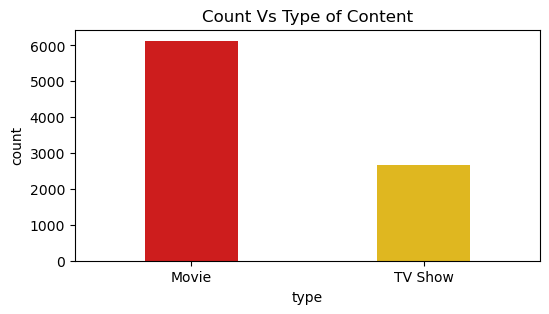

In [19]:
plt.figure(figsize=(6,3))
sn.countplot(x='type',data=df,width=0.4,palette='hot')
plt.title('Count Vs Type of Content')
plt.show()

##### Country Analysis

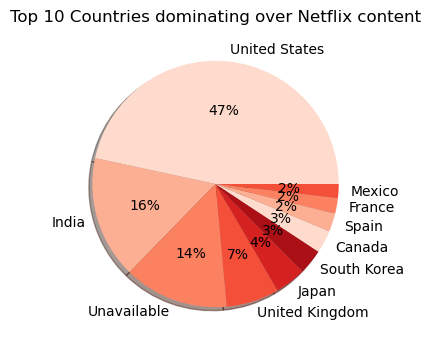

In [20]:
plt.figure(figsize=(7,4))
label=df['country'].value_counts().index[0:10]
count=np.array(df['country'].value_counts().head(10))
colors = sn.color_palette('Reds')
plt.pie(count,labels=label,colors = colors,autopct='%.0f%%', shadow=True)  
plt.title('Top 10 Countries dominating over Netflix content')
plt.show()

In [21]:
country_movies=df[df['type']=='Movie']
country_TV_shows=df[df['type']=='TV Show']

Text(0.5, 1.0, 'Type of Content Country wise Vs Count')

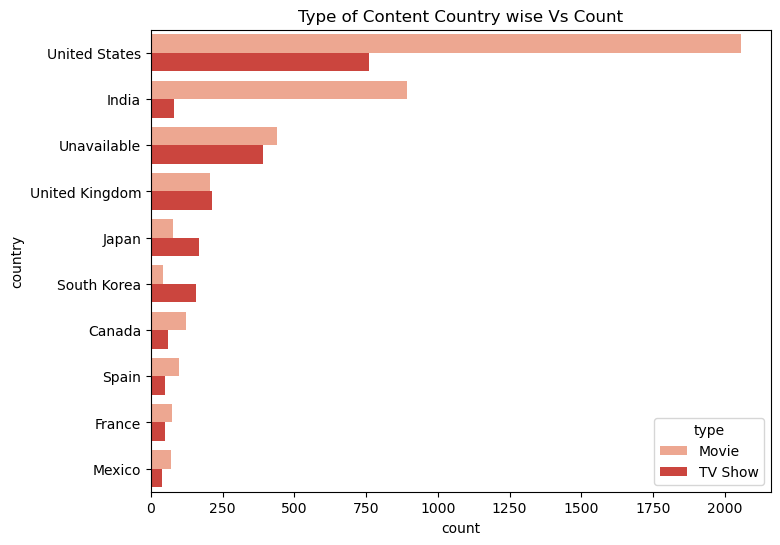

In [22]:
plt.figure(figsize=(8,6))
sn.countplot(y='country',order=df['country'].value_counts().index[0:10],data=df,hue='type',palette='Reds')
plt.title('Type of Content Country wise Vs Count')

Text(0.5, 1.0, 'Rating of shows on Netflix Vs Count')

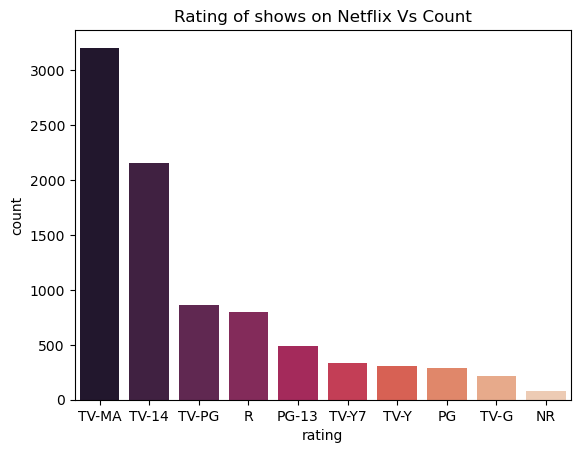

In [23]:
sn.countplot(x='rating',order=df['rating'].value_counts().index[0:10],data=df,palette='rocket')
plt.title("Rating of shows on Netflix Vs Count")

Text(0.5, 1.0, ' Count of content released year wise on Netflix')

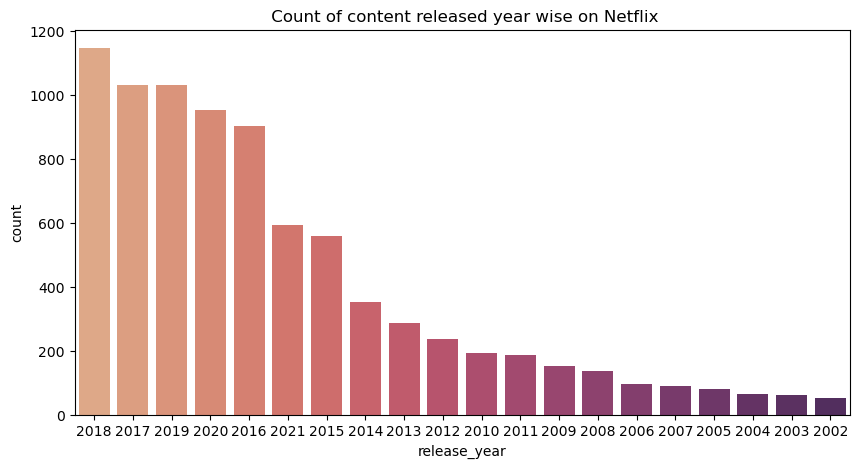

In [24]:
plt.figure(figsize=(10,5))
sn.countplot(x='release_year',order=df['release_year'].value_counts().index[0:20],data=df,palette='flare')
plt.title(" Count of content released year wise on Netflix")

Text(0.5, 1.0, ' Popularity of Genres')

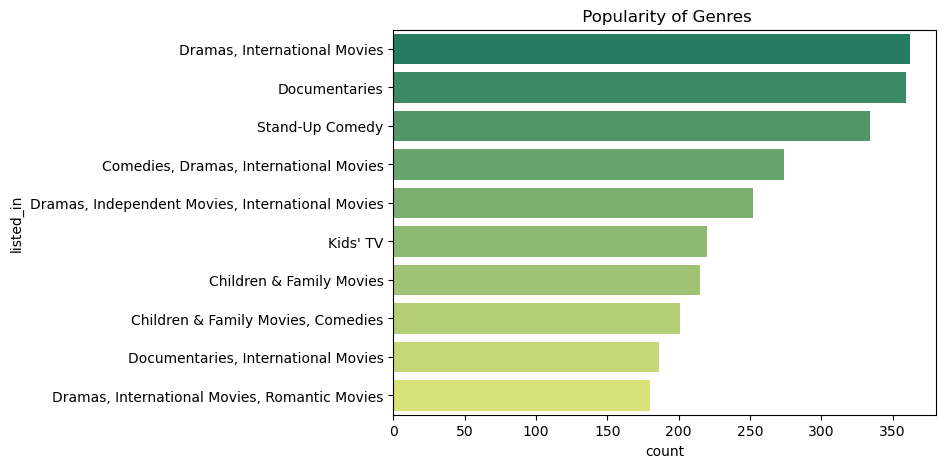

In [25]:
plt.figure(figsize=(7,5))
sn.countplot(y='listed_in',order=df['listed_in'].value_counts().index[0:10],data=df,palette='summer')
plt.title(" Popularity of Genres")

#### Summary

So far we have performed a lot of operations over the dataset to dig out some useful information from it,we can sat that :
- Netflix has more movies than TV shows
- Most number of movies and TV shows are produced by United States ,followed by India holding second position
- A large proportion of content on Netflix is for MA (Matured Auudience)
- 2018 is the year during which Netflix produced a large count of content as compared to the other years.
- International Movies and Drama are the most popuplar Genres on Netflix